In [1]:
import numpy as np
import pandas as pd

In [3]:
dataframe=pd.read_csv('C:/Users/shyam/Downloads/train_ss.csv')

In [4]:
dataframe.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
dataframe['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [7]:
dataframe.groupby('Category')['Sales'].count()

Category
Furniture          2078
Office Supplies    5909
Technology         1813
Name: Sales, dtype: int64

In [9]:
df_f=dataframe[dataframe.Category=='Furniture'].sort_values('Order Date')

In [12]:
df_f.shape

(2078, 18)

In [13]:
df_f['Order Date']= pd.to_datetime(df_f['Order Date'])

In [15]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 4009 to 2136
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2078 non-null   int64         
 1   Order ID       2078 non-null   object        
 2   Order Date     2078 non-null   datetime64[ns]
 3   Ship Date      2078 non-null   object        
 4   Ship Mode      2078 non-null   object        
 5   Customer ID    2078 non-null   object        
 6   Customer Name  2078 non-null   object        
 7   Segment        2078 non-null   object        
 8   Country        2078 non-null   object        
 9   City           2078 non-null   object        
 10  State          2078 non-null   object        
 11  Postal Code    2076 non-null   float64       
 12  Region         2078 non-null   object        
 13  Product ID     2078 non-null   object        
 14  Category       2078 non-null   object        
 15  Sub-Category   207

In [17]:
df_f=df_f.loc[:,df_f.columns.isin(['Order Date', 'Sales'])].reset_index(drop=True)
df_f.head()

,Order Date,Sales
0,2018-01-01,474.430
1,2018-01-01,141.420
2,2018-01-01,48.896
3,2018-01-01,310.744
4,2015-01-03,457.568


In [18]:
df_f=df_f.groupby('Order Date')['Sales'].sum().reset_index()

In [19]:
df_f

,Order Date,Sales
0,2015-01-03,1893.9950
1,2015-01-06,2024.0600
2,2015-01-08,44.1280
3,2015-01-11,31.6800
4,2015-01-12,4513.6060
...,...,...
872,2018-12-24,1393.4940
873,2018-12-25,832.4540
874,2018-12-28,551.2568
875,2018-12-29,2330.7180


In [20]:
df_f=df_f.set_index('Order Date')

In [22]:
y=df_f['Sales'].resample('MS').mean()
y[0:15]

Order Date
2015-01-01     924.024462
2015-02-01     248.475714
2015-03-01     778.884778
2015-04-01     525.167692
2015-05-01     390.457467
2015-06-01     611.823918
2015-07-01     601.328500
2015-08-01     762.809906
2015-09-01     844.152147
2015-10-01     818.771824
2015-11-01    1002.974167
2015-12-01    1380.420941
2016-01-01    1463.433262
2016-02-01     894.442556
2016-03-01     617.389662
Freq: MS, Name: Sales, dtype: float64

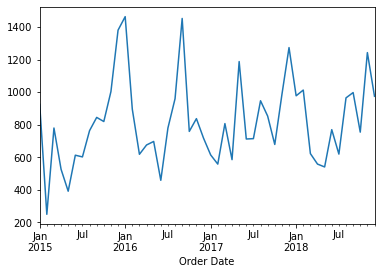

In [23]:
y.plot()

In [24]:
y_train=y[:len(y)-11]
y_test=y[len(y)-11:]

In [25]:
y_train[-5:]

Order Date
2017-09-01     852.411695
2017-10-01     677.889150
2017-11-01     983.663476
2017-12-01    1273.200938
2018-01-01     976.935250
Freq: MS, Name: Sales, dtype: float64

NameError: name 'plt' is not defined

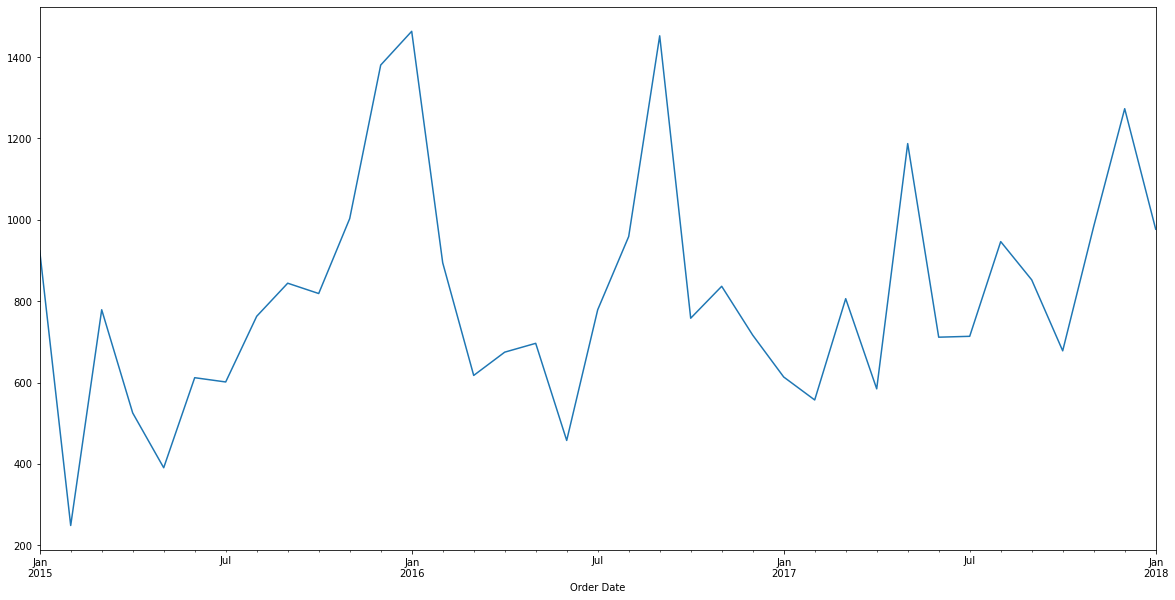

In [27]:
y_train.plot(figsize=(20,10))
plt.show()

In [29]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y_train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.006177
p-value: 0.001379
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612


In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [32]:
from matplotlib import pyplot as plt
%matplotlib inline

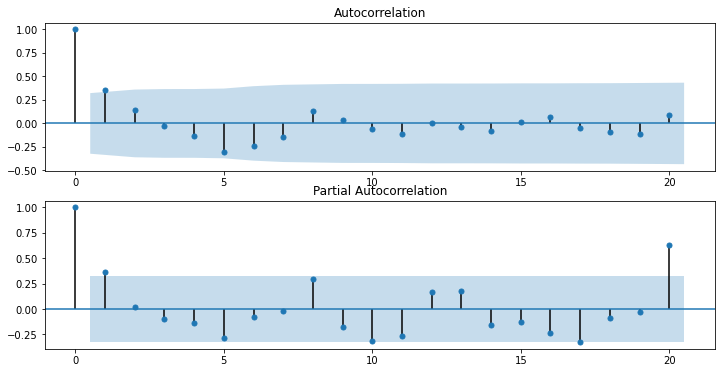

In [33]:
fig, ax=plt.subplots(2, figsize=(12,6))
ax[0]=plot_acf(y_train, ax=ax[0], lags=20)
ax[1]=plot_pacf(y_train, ax=ax[1], lags=20)

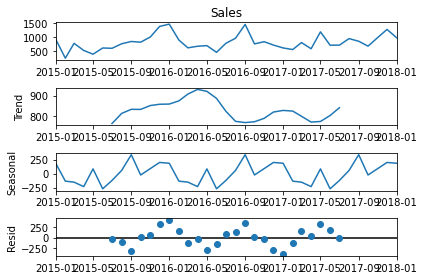

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_dc=seasonal_decompose(y_train, model='additive')
result_dc.plot()
plt.show()

In [35]:
p=d=q=range(0,2)

In [37]:
import itertools
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)


In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [42]:
metric_aic_dict=dict()

for pm in pdq:
    for pm_seasonal in seasonal_pdq:
        try:
            model=SARIMAX(y_train, order=pm, seasonal_order=pm_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)
            model_aic=model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(pm,seasonal_pm,model_aic.aic))
            metric_aic_dict.update({(pm,pm_seasonal):model_aic.aic})
        except:
            continue

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [45]:
model=SARIMAX(y_train, order=(1,1,0), seasonal_order=(1,1,0,12),
                         enforce_stationarity=False,
                         enforce_invertibility=False)
model_aic=model.fit()

In [47]:
model_aic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   37
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 -77.672
Date:                            Sun, 18 Sep 2022   AIC                            161.345
Time:                                    19:58:16   BIC                            162.538
Sample:                                01-01-2015   HQIC                           160.592
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3426      0.364     -0.942      0.346      -1.056       0.371
ar.S.L12      -0.6800      0.410     -1.658      0.097      -1.484       0.124
sigma2      7.957e+04   4.18e+04      1.905      0.057   -2282.422    1.61e+05
===================================================================================
Ljung-Box (Q):                        6.55   Jarque-Bera (JB):                 1.69
Prob(Q):                              0.77   Prob(JB):                         0.43
Heteroskedasticity (H):               0.24   Skew:                             0.94
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""